# ファイル入出力

## 基本

In [1]:
f = open("../data/input.txt")

IOStream(<file ../data/input.txt>)

`open`でIOStreamが作成される。

`readlines`で1行づつ要素になったリストが返される。

In [2]:
f = open("../data/input.txt")
ret = readlines(f)
ret

2-element Vector{String}:
 "Hello Julia!"
 "hello"

In [3]:
f = open("../data/input.txt")
for line in eachline(f)
    println(line)
end

Hello Julia!
hello


## JSON

`JSON.jl`パッケージを利用する。
そのため、予めパッケージのインストールは済ませておくこと。

```
add JSON
```

In [4]:
using JSON
JSON.parsefile("../data/test.json")

Dict{String, Any} with 3 entries:
  "name"        => "Hoge"
  "birthday"    => "08-05"
  "affiliation" => Any["collegeA", "comA", "comB"]

In [5]:
d = Dict(
    "name" => "Fuga", 
    "birthday" => "04-01", 
    "affiliation" => ["BB", "CC", "DD"]
)

Dict{String, Any} with 3 entries:
  "name"        => "Fuga"
  "birthday"    => "04-01"
  "affiliation" => ["BB", "CC", "DD"]

In [6]:
JSON.json(d)

"{\"name\":\"Fuga\",\"birthday\":\"04-01\",\"affiliation\":[\"BB\",\"CC\",\"DD\"]}"

## CSV

`CSV.jl`パッケージを使う

In [7]:
using CSV
f = CSV.File("../data/test.csv")
for row in f
    println(row)
end

CSV.Row:
 :col1             "A"
 Symbol(" col2")  1
 Symbol(" col3")   " asdf"
CSV.Row:
 :col1             "B"
 Symbol(" col2")  2
 Symbol(" col3")   " zxcv"
CSV.Row:
 :col1             "C"
 Symbol(" col2")  3
 Symbol(" col3")   " qwer"


In [8]:
f

3-element CSV.File{false}:
 CSV.Row: (col1 = "A",  col2 = 1,  col3 = " asdf")
 CSV.Row: (col1 = "B",  col2 = 2,  col3 = " zxcv")
 CSV.Row: (col1 = "C",  col2 = 3,  col3 = " qwer")

# 他言語の呼び出し

## Pythonの呼び出し

`PyCall.jl`を利用する。

pythonのモジュールをJuliaのオブジェクトのように使える。文字列の前に`py`をつけると、Pythonのコードとして解釈される。

インストールはいつものように、REPLから実施。

In [9]:
using PyCall

const pyabs = py"abs"

PyObject <built-in function abs>

In [10]:
pyabs(-1.2)

1.2

Pythonモジュールも同様に扱えるが、`pyimport`でモジュールを読み込む。
`.`でメソッドを利用できる。

In [11]:
const pystats = pyimport("scipy.stats")

PyObject <module 'scipy.stats' from '/opt/conda/lib/python3.9/site-packages/scipy/stats/__init__.py'>

In [12]:
pystats.norm(loc=2.0, scale=1.0).rvs(size=10)

10-element Vector{Float64}:
 3.6843818901638787
 0.9601903661744853
 3.517473427654746
 1.1959318869290074
 3.678869995642194
 3.099259083246876
 2.960654242081981
 1.4693040563447748
 0.9316236901858359
 0.45298474884963813

# ドキュメンテーション

Juliaでは、関数定義の直前にMarkdownで文字列を入力しておくと、その文字列が関数のdocstringとして解釈される。

Jupytyerでは、`?{object-name}`でobjectのdocstringを確認できる。ただ、見出しがそのままjupyterの見出しと競合してしまうので、見出し番号をつけている場合とか、TOCを使っている場合には要注意。

In [13]:
"""
    foo(x, y)

`foo` is sample function.

## Arguments
- x: numeric parameter
- y: numeric parameter

## Examples

```jldoctest
julia> foo(1, 2)
3
```

"""
function foo(x, y)
    return x + y
end

foo

In [14]:
?Main.foo

```
foo(x, y)
```

`foo` is sample function.

## Arguments

  * x: numeric parameter
  * y: numeric parameter

## Examples

```jldoctest
julia> foo(1, 2)
3
```


# 可視化

`PyPlot.jl`を使ってみる。

これは、matplotlibパッケージのJuliaインターフェース。matplotlibの機能がほぼそのままJuliaでも使えるので、高機能だし、学習コストが低い。

In [15]:
using PyPlot

PyPlot.version

v"3.4.2"

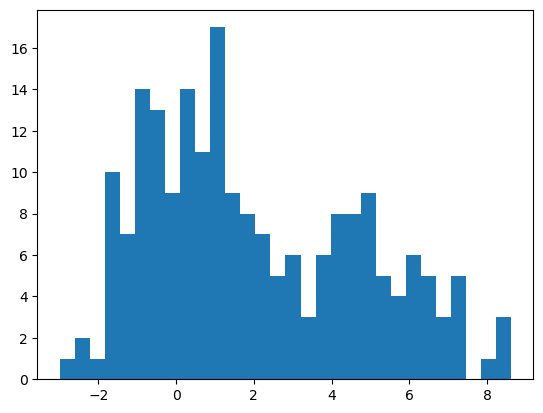

In [16]:
x = vcat(randn(100), 2*randn(100).+ 4);
hist(x, bins=30);

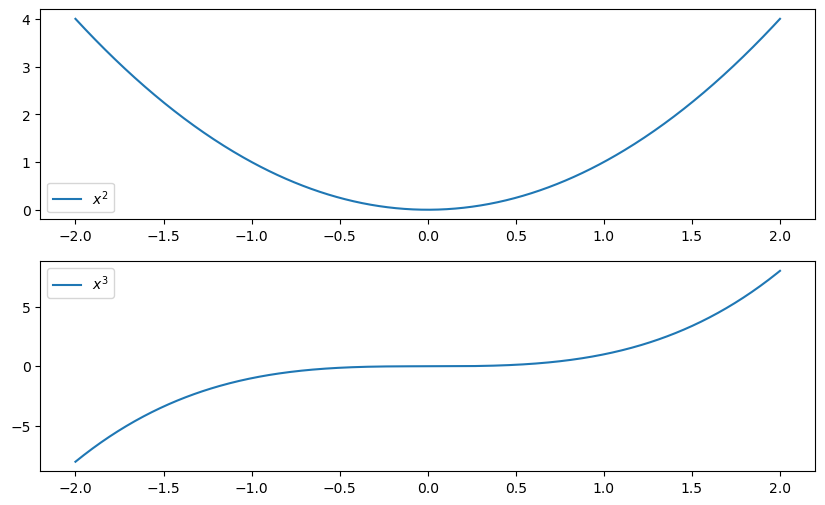

In [17]:
x = range(-2, 2, length=500);
y1 = x.^2
y2 = x.^3

fig = figure(figsize=(10, 6));
ax = fig.subplots(2, 1);
ax[1].plot(x, y1, label="\$x^2\$")
ax[2].plot(x, y2, label="\$x^3\$")
ax[1].legend();
ax[2].legend();